In [48]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv("C:\\Users\\SHANMUGAPRIYAA\\OneDrive\\Documents\\drugsComTest_raw.csv")
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [50]:
# taking out information from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [51]:
# Print the unique values for drug name
unique_medicines = df['drugName'].value_counts()
print('*'*100)
print("Drug Names and their counts:")
print(unique_medicines)
print('*'*100)
print("Count of unique Medicines:",len(unique_medicines))
print('*'*100)

****************************************************************************************************
Drug Names and their counts:
Levonorgestrel                       1273
Etonogestrel                         1085
Ethinyl estradiol / norethindrone     903
Nexplanon                             736
Ethinyl estradiol / norgestimate      673
                                     ... 
Onfi                                    1
Nimotop                                 1
Elestrin                                1
Urispas                                 1
FluMist                                 1
Name: drugName, Length: 2637, dtype: int64
****************************************************************************************************
Count of unique Medicines: 2637
****************************************************************************************************


In [52]:
# Print the unique values for drug name
condition_counts = df['condition'].value_counts()
print('*'*100)
print("Conditions and their counts:")
print(condition_counts)
print('*'*100)
print("Count of unique Condition:",len(condition_counts))
print('*'*100)

****************************************************************************************************
Conditions and their counts:
Birth Control                                  9648
Depression                                     3095
Pain                                           2100
Anxiety                                        1908
Acne                                           1847
                                               ... 
Gender Dysphoria                                  1
83</span> users found this comment helpful.       1
Meningococcal Meningitis Prophylaxis              1
Tympanostomy Tube Placement Surgery               1
Strongyloidiasis                                  1
Name: condition, Length: 708, dtype: int64
****************************************************************************************************
Count of unique Condition: 708
****************************************************************************************************


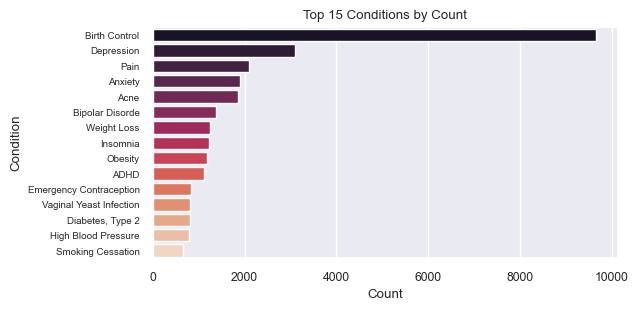

In [53]:
# Count the number of occurrences of each unique condition
condition_counts = df['condition'].value_counts()

# Plot the condition and their count using a bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x=condition_counts[:15], y=condition_counts[:15].index, palette='rocket')
plt.title('Top 15 Conditions by Count')
plt.yticks(ha='right',fontsize=7)
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

In [54]:
# describing the data
df.describe()

,uniqueID,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


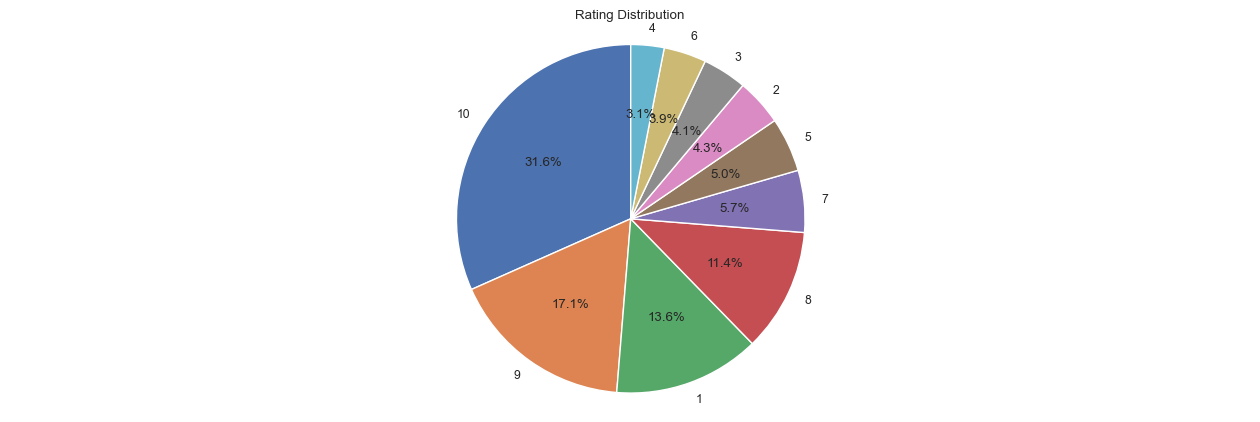

In [55]:
# Group the ratings and count the occurrences
rating_counts = df['rating'].value_counts()
# Get the unique ratings and their corresponding counts
ratings = rating_counts.index
counts = rating_counts.values
# Create a pie chart
plt.pie(counts, labels=ratings, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Rating Distribution')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Display the chart
plt.show()

****************************************************************************************************
Top 15 drugs with rating equals 10 and their counts:
Levonorgestrel                        497
Phentermine                           272
Etonogestrel                          224
Varenicline                           187
Clonazepam                            154
Ethinyl estradiol / norethindrone     148
Escitalopram                          143
Sertraline                            141
Alprazolam                            134
Chantix                               124
Mirena                                122
Nexplanon                             121
Ethinyl estradiol / levonorgestrel    115
Liraglutide                           115
Plan B                                114
Name: drugName, dtype: int64
****************************************************************************************************


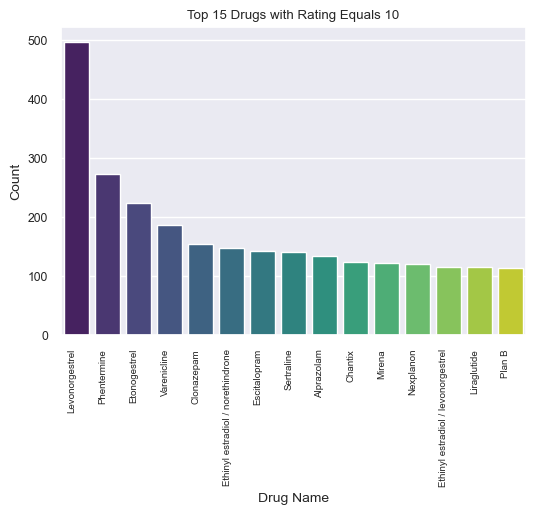

In [56]:
# Get the top 10 drugs with rating equals 10 and their counts
top_drugs = df.loc[df['rating'] == 10, :]['drugName'].value_counts().head(15)
print('*'*100)
print('Top 15 drugs with rating equals 10 and their counts:')
print(top_drugs)
print('*'*100)

# Plot the top drugs with their counts
plt.figure(figsize=(6, 4))
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='viridis')
plt.xticks(rotation=90, ha='right',fontsize=7)
plt.xlabel('Drug Name',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Top 15 Drugs with Rating Equals 10')
plt.show()

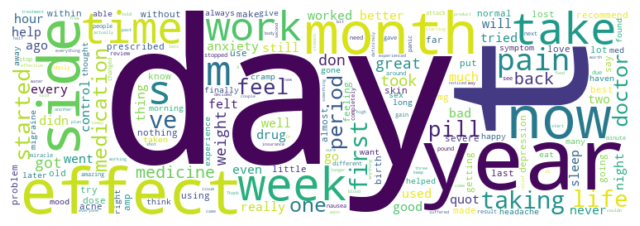

In [57]:
from wordcloud import WordCloud, STOPWORDS

df_rate_ten = df.loc[df.rating == 10, 'review']
text = (' '.join(df_rate_ten))

wordcloud = WordCloud(width=750, height=250, background_color='white', stopwords=STOPWORDS, collocations=False, max_words=200, contour_color='steelblue', contour_width=2).generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

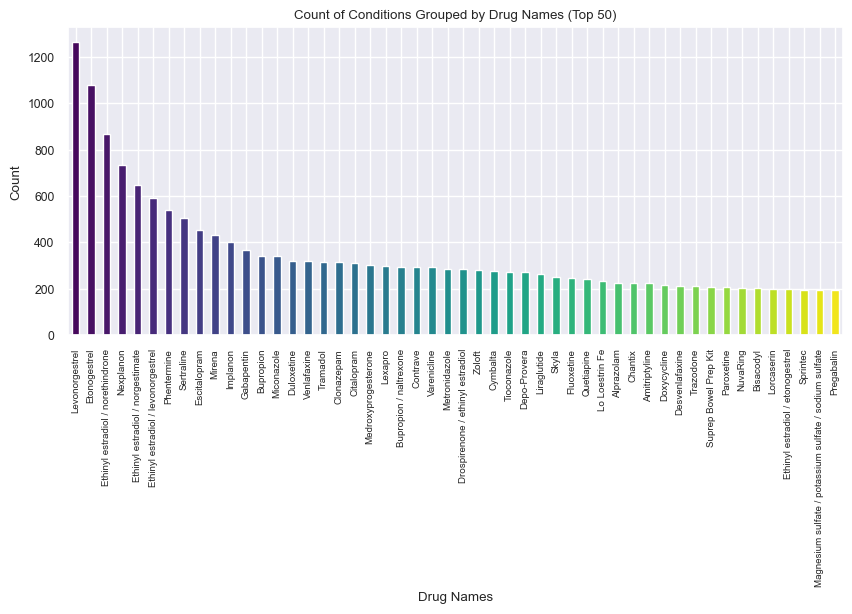

In [58]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Group the conditions by drug names and count the occurrences
drug_conditions = df.groupby('drugName')['condition'].count()
# Sort the values in descending order
drug_conditions = drug_conditions.sort_values(ascending=False)
# Select the top 50 values
top_50_drug_conditions = drug_conditions[:50]
# Create a colormap with a gradient color scheme
cmap = sns.color_palette("viridis", len(top_50_drug_conditions))
# Plot the bar plot with gradient color
plt.figure(figsize=(10, 4))
top_50_drug_conditions.plot(kind='bar', color=cmap)
# Set the title and axis labels
plt.title('Count of Conditions Grouped by Drug Names (Top 50)')
plt.xlabel('Drug Names')
plt.ylabel('Count')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90 ,fontsize=7)
# Display the plot
plt.show()

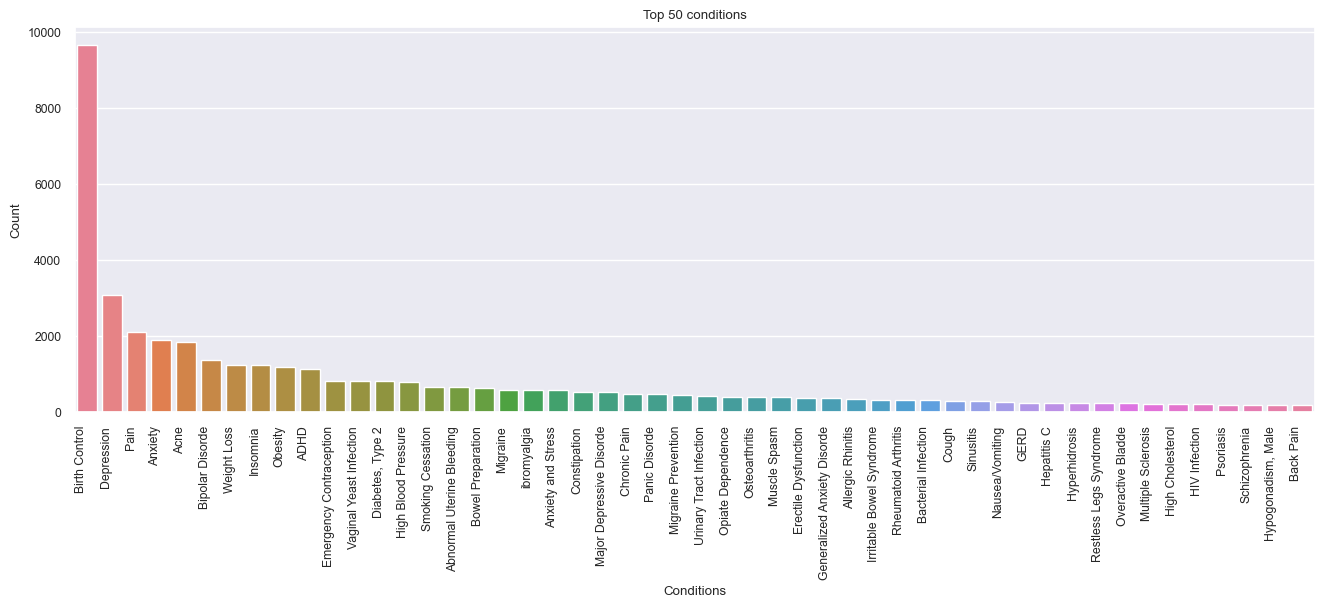

In [59]:
# This barplot show the top 50 conditions the people are suffering.
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:50]
values = list(cond.values())[0:50]
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.rcParams['figure.figsize'] = [16, 5]
plt.xticks(rotation=90, ha='right')

sns_ = sns.barplot(x = top_condition, y = values, palette = 'husl')
sns_.set_title("Top 50 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

# Preprocessing of the data

In [60]:
import re
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)   
    # Convert text to lowercase
    text = text.lower()   
    return text
# Clean the 'review' column and convert to lowercase
df['review_cleaned'] = df['review'].apply(clean_text).str.lower()

In [61]:
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_cleaned
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,i ve tried a few antidepressants over the yea...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,my son has crohn s disease and has done very ...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction of symptoms


In [62]:
#tokenize the text into individual words or tokens.
import nltk
# Download necessary resources for tokenization
nltk.download('punkt')
# Tokenize the text
df['tokens'] = df['review_cleaned'].apply(nltk.word_tokenize)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [63]:
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_cleaned,tokens
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,i ve tried a few antidepressants over the yea...,"[i, ve, tried, a, few, antidepressants, over, ..."
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,my son has crohn s disease and has done very ...,"[my, son, has, crohn, s, disease, and, has, do..."
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction of symptoms,"[quick, reduction, of, symptoms]"


In [64]:
#Remove stop words (common words like "the," "is," etc.) that do not contribute much to sentiment analysis.
import nltk
from nltk.corpus import stopwords
# Download the stopwords corpus
nltk.download('stopwords')
# Get the English stopwords
stop_words = set(stopwords.words('english'))
# Function to remove stop words
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens
# Remove stop words from the tokens
df['tokens_filtered'] = df['tokens'].apply(remove_stopwords)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [65]:
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_cleaned,tokens,tokens_filtered
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,i ve tried a few antidepressants over the yea...,"[i, ve, tried, a, few, antidepressants, over, ...","[tried, antidepressants, years, citalopram, fl..."
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,my son has crohn s disease and has done very ...,"[my, son, has, crohn, s, disease, and, has, do...","[son, crohn, disease, done, well, asacol, comp..."
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction of symptoms,"[quick, reduction, of, symptoms]","[quick, reduction, symptoms]"


In [66]:
#Perform stemming or lemmatization to reduce words to their root form.
import nltk
from nltk.stem import WordNetLemmatizer
# Download the WordNet lemmatizer resources
nltk.download('wordnet')
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
# Function to perform lemmatization
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
# Lemmatize the filtered tokens
df['lemmatized_tokens'] = df['tokens_filtered'].apply(lemmatize_tokens)

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [67]:
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_cleaned,tokens,tokens_filtered,lemmatized_tokens
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,i ve tried a few antidepressants over the yea...,"[i, ve, tried, a, few, antidepressants, over, ...","[tried, antidepressants, years, citalopram, fl...","[tried, antidepressant, year, citalopram, fluo..."
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,my son has crohn s disease and has done very ...,"[my, son, has, crohn, s, disease, and, has, do...","[son, crohn, disease, done, well, asacol, comp...","[son, crohn, disease, done, well, asacol, comp..."
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction of symptoms,"[quick, reduction, of, symptoms]","[quick, reduction, symptoms]","[quick, reduction, symptom]"


In [68]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores
# Apply the sentiment analysis model to the 'review' column
df['sentiment_scores'] = df['review'].apply(get_sentiment_scores)

In [69]:
# Define a function to map sentiment scores to sentiment labels
def get_sentiment_label(sentiment_scores, threshold=0.05):
    compound_score = sentiment_scores['compound']
    if compound_score >= threshold:
        return 'positive'
    elif compound_score <= -threshold:
        return 'negative'
    else:
        return 'neutral'
# Apply the function to the 'sentiment_scores' column and store the labels in a new column
df['sentiment_label'] = df['sentiment_scores'].apply(get_sentiment_label)

In [70]:
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_cleaned,tokens,tokens_filtered,lemmatized_tokens,sentiment_scores,sentiment_label
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,i ve tried a few antidepressants over the yea...,"[i, ve, tried, a, few, antidepressants, over, ...","[tried, antidepressants, years, citalopram, fl...","[tried, antidepressant, year, citalopram, fluo...","{'neg': 0.212, 'neu': 0.61, 'pos': 0.178, 'com...",negative
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,my son has crohn s disease and has done very ...,"[my, son, has, crohn, s, disease, and, has, do...","[son, crohn, disease, done, well, asacol, comp...","[son, crohn, disease, done, well, asacol, comp...","{'neg': 0.126, 'neu': 0.761, 'pos': 0.113, 'co...",positive
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,quick reduction of symptoms,"[quick, reduction, of, symptoms]","[quick, reduction, symptoms]","[quick, reduction, symptom]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


In [71]:
# Print the count of positive, negative, and neutral sentiments
sentiment_counts = df['sentiment_label'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
negative    26954
positive    24230
neutral      2582
Name: sentiment_label, dtype: int64


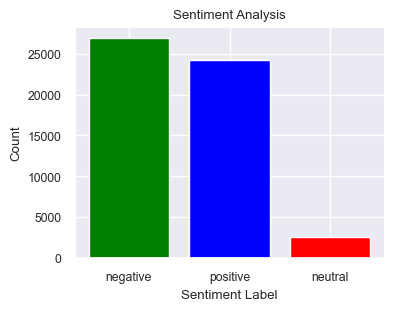

In [72]:
# Get the count of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()
# Set the figure size
plt.figure(figsize=(4, 3))
# Define the colors for the bars
colors = ['green', 'blue', 'red']
# Create a bar plot with custom colors
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
# Show the plot
plt.show()

# Feature Extraction

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
# Apply CountVectorizer to the 'review' column
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(df['sentiment_label'])
feature_names = vectorizer.get_feature_names()
feature_df = pd.DataFrame(features.toarray(), columns=feature_names)

C:\Users\SHANMUGAPRIYAA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the preprocessed text data
features = vectorizer.fit_transform(df['sentiment_label'])
# Convert the feature matrix to an array
feature_array = features.toarray()
# Create a DataFrame with the feature vectors
feature_df = pd.DataFrame(feature_array, columns=vectorizer.get_feature_names())

C:\Users\SHANMUGAPRIYAA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
from gensim.models import Word2Vec
tokenized_sentences = [sentence.split() for sentence in df['sentiment_label']]
# Train Word2Vec model
embedding_size = 100  # Specify the desired dimensionality of the word embeddings
model = Word2Vec(sentences=tokenized_sentences, vector_size=embedding_size, min_count=1)
# Function to compute the sentence embedding
def get_sentence_embedding(sentence):
    embedding = np.zeros(embedding_size)
    count = 0
    for word in sentence:
        if word in model.wv.key_to_index:
            embedding += model.wv.get_vector(word)
            count += 1
    if count > 0:
        embedding /= count
    return embedding
# Compute the sentence embeddings for each document
sentence_embeddings = [get_sentence_embedding(sentence) for sentence in tokenized_sentences]
feature_df = pd.DataFrame(sentence_embeddings)

In [76]:
from sklearn.preprocessing import StandardScaler
# Select the numerical features to be scaled
numerical_features = ['rating', 'usefulCount']
# Create a subset of the dataframe with only numerical features
numerical_df = df[numerical_features]
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the numerical features
scaled_features = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)
# Concatenate the scaled numerical features with the original dataframe
df_scaled = pd.concat([df.drop(columns=numerical_features), scaled_df], axis=1)
# Print the updated dataframe with the scaled numerical features
print(df_scaled.head(3))

   uniqueID     drugName                     condition  \
0    163740  Mirtazapine                    Depression   
1    206473   Mesalamine  Crohn's Disease, Maintenance   
2    159672      Bactrim       Urinary Tract Infection   

                                              review       date  \
0  "I&#039;ve tried a few antidepressants over th...  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...  17-May-09   
2                      "Quick reduction of symptoms"  29-Sep-17   

                                      review_cleaned  \
0   i ve tried a few antidepressants over the yea...   
1   my son has crohn s disease and has done very ...   
2                       quick reduction of symptoms    

                                              tokens  \
0  [i, ve, tried, a, few, antidepressants, over, ...   
1  [my, son, has, crohn, s, disease, and, has, do...   
2                   [quick, reduction, of, symptoms]   

                                     tokens_filt

# Model Selection

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
# Filter the data to exclude neutral sentiments
filtered_df = df[df['sentiment_label'] != 'neutral']
# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_df['lemmatized_tokens'], filtered_df['sentiment_label'], test_size=0.2, random_state=42)
# Convert the lemmatized tokens to sentences
X_train_sentences = [' '.join(tokens) for tokens in X_train]
X_test_sentences = [' '.join(tokens) for tokens in X_test]

In [78]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train_sentences)
# Initialize the Naive Bayes classifier
classifier = MultinomialNB()
# Define the parameter grid for grid search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}
# Create the grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Train the classifier with grid search
grid_search.fit(X_train_vectorized, y_train)
# Get the best model and its hyperparameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test_sentences)
# Predict the sentiment labels for the testing data using the best model
y_pred = best_classifier.predict(X_test_vectorized)

In [79]:
# Evaluate the accuracy of the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.7570577317573508


In [80]:
from sklearn.metrics import classification_report
# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.76      0.77      5380
    positive       0.74      0.76      0.75      4857

    accuracy                           0.76     10237
   macro avg       0.76      0.76      0.76     10237
weighted avg       0.76      0.76      0.76     10237



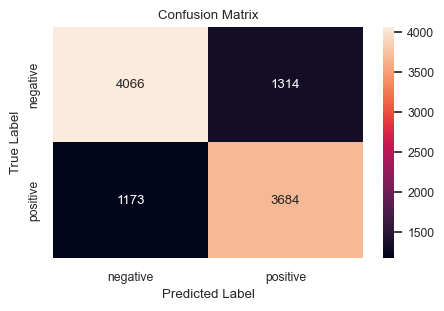

In [81]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Set the labels for the x-axis and y-axis
labels = np.unique(y_test)
plt.figure(figsize=(5, 3))
# Create a heatmap with the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
# Set the title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Show the plot
plt.show()

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
# Initialize the Bernoulli Naive Bayes classifier
classifier = BernoulliNB()
# Define the parameter grid for grid search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}
# Create the grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)
# Train the classifier with grid search
grid_search.fit(X_train_vectorized, y_train)
# Get the best model and its hyperparameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test_sentences)
# Predict the sentiment labels for the testing data using the best model
y_pred = best_classifier.predict(X_test_vectorized)

In [83]:
# Calculate the accuracy of the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.7491452573996288


In [84]:
from sklearn.metrics import classification_report
# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.73      0.75      5380
    positive       0.72      0.77      0.74      4857

    accuracy                           0.75     10237
   macro avg       0.75      0.75      0.75     10237
weighted avg       0.75      0.75      0.75     10237



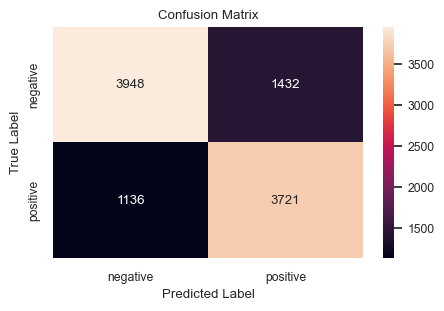

In [85]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Set the labels for the x-axis and y-axis
labels = np.unique(y_test)
plt.figure(figsize=(5, 3))
# Create a heatmap with the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
# Set the title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Show the plot
plt.show()

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_tokens'], df['sentiment_label'], test_size=0.2, random_state=42)
# Convert the lemmatized tokens to sentences
X_train_sentences = [' '.join(tokens) for tokens in X_train]
X_test_sentences = [' '.join(tokens) for tokens in X_test]

In [90]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train_sentences).toarray()
# Initialize the Gaussian Naive Bayes classifier
classifier = GaussianNB()
# Train the classifier
classifier.fit(X_train_vectorized, y_train)
# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test_sentences).toarray()

In [91]:
# Predict the sentiment labels for the testing data
y_pred = classifier.predict(X_test_vectorized)

In [92]:
# Calculate the accuracy of the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.4217965408220197


In [93]:
from sklearn.metrics import classification_report
# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.19      0.30      5407
     neutral       0.13      0.62      0.21       507
    positive       0.48      0.66      0.55      4840

    accuracy                           0.42     10754
   macro avg       0.42      0.49      0.35     10754
weighted avg       0.55      0.42      0.41     10754



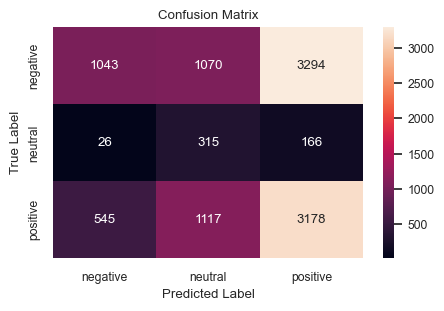

In [94]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Set the labels for the x-axis and y-axis
labels = np.unique(y_test)
plt.figure(figsize=(5, 3))
# Create a heatmap with the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
# Set the title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Show the plot
plt.show()

# Prediction

In [95]:
def map_condition_drug(df):
    condition_drug_map = {}
    for index, row in df.iterrows():
        condition = row['condition']
        drug_name = row['drugName']
        if condition not in condition_drug_map:
            condition_drug_map[condition] = set()
        condition_drug_map[condition].add(drug_name)
    return condition_drug_map

In [96]:
condition_drug_mapping = map_condition_drug(df)
# Prompt the user to enter a condition
condition_input = input("Enter a condition: ")
# Get the corresponding drug names for the input condition
if condition_input in condition_drug_mapping:
    drug_names = condition_drug_mapping[condition_input]
    print(f"Condition: {condition_input}")
    print(f"Drug Names: {', '.join(drug_names)}")
else:
    print("No drug names found for the input condition.")

Enter a condition: Pain
Condition: Pain
Drug Names: Indocin SR, Ultram, Hydrocodone / ibuprofen, Hydroxyzine, Pregabalin, Acetaminophen, Nubain, Exparel, Hysingla ER, Indocin, Voltaren, Fentora, Sublimaze, Belbuca, Pamelor, Naloxone / pentazocine, Methadose, Oxydose, Capzasin, Buprenorphine, Acetaminophen / propoxyphene, Camphor / menthol, Levo-Dromoran, Ultram ER, Stadol, Bextra, Duloxetine, Panlor DC, Aspirin / caffeine, Nortriptyline, Meperidine, Neurontin, Lortab, Motrin IB, Duragesic, Atarax, Opana ER, Dilaudid, Naproxen, Elavil, Morphine, Anacin, Acetaminophen / aspirin / caffeine / salicylamide, Trilisate, Oxymorphone, Advil, OxyContin, Ibuprofen, Levorphanol, Acetaminophen / aspirin, Naprelan, Dilaudid-HP, Xylocaine Jelly, Acetaminophen / codeine, Morphine / naltrexone, Aleve, Propoxyphene, Celebrex, Hydromorphone, MS Contin, Sulindac, Percocet, Acetaminophen / hydrocodone, Acetaminophen / caffeine / dihydrocodeine, Vicodin HP, Ketoprofen, Lyrica, Fiorinal, Nucynta, Methadone D